<a href="https://colab.research.google.com/github/REHAB199/Saudi-Arabia-Weather-Deep-learning/blob/main/Code/saudi_arabia_weather_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Import the libraries

 ---

In [99]:
# pandas
import pandas as pd
from pandas import datetime
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime

# numpy
import numpy as np
from numpy import array

# visualization
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px

# warnings
import warnings
warnings.filterwarnings('ignore')

# sklearn 
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# math
from math import sqrt

# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Bidirectional, LSTM

## Loading & reading the data

---

In [101]:
df = pd.read_csv('/content/mkhdata.csv')

In [68]:
df

Unnamed: 0   city        date  ... humidity  barometer  visibility
0           94805  Mecca  2017-01-01  ...     69.0     1016.0          16
1           94806  Mecca  2017-01-01  ...     73.0     1015.0          16
2           94807  Mecca  2017-01-01  ...     73.0     1015.0          16
3           94808  Mecca  2017-01-01  ...     73.0     1015.0          16
4           94809  Mecca  2017-01-01  ...     73.0     1015.0          16
...           ...    ...         ...  ...      ...        ...         ...
20263      115068  Mecca  2019-04-30  ...     43.0     1009.0          16
20264      115069  Mecca  2019-04-30  ...     46.0     1009.0          16
20265      115070  Mecca  2019-04-30  ...     49.0     1010.0          16
20266      115071  Mecca  2019-04-30  ...     49.0     1010.0          16
20267      115072  Mecca  2019-04-30  ...     43.0     1010.0          16

[20268 rows x 15 columns]

In [69]:
df.describe()

Unnamed: 0          year  ...     barometer    visibility
count   20268.000000  20268.000000  ...  20268.000000  20268.000000
mean   104938.500000   2017.710480  ...   1008.713919     10.711417
std      5851.011964      0.698316  ...      4.854478      7.460926
min     94805.000000   2017.000000  ...    996.000000     -1.000000
25%     99871.750000   2017.000000  ...   1005.000000     -1.000000
50%    104938.500000   2018.000000  ...   1009.000000     16.000000
75%    110005.250000   2018.000000  ...   1013.000000     16.000000
max    115072.000000   2019.000000  ...   1021.000000     16.000000

[8 rows x 11 columns]

## Data Cleaning
---

In [102]:
# Unnamed: 0 is irrlevent 
delete_col =['Unnamed: 0']
df.drop(delete_col, axis =1 , inplace =True)

In [71]:
df.shape

(20268, 14)

In [72]:
# Converting the dt column to datetime object 
df['Datetime'] = pd.to_datetime(df['date'].apply(str)+' '+df['time'])
# Sorting by the date 
df.sort_values('Datetime', inplace=True)

In [73]:
# Features used in models
features = ['temp', 'humidity', 'barometer']

In [74]:
df[features].head()


temp  humidity  barometer
0    22      69.0     1016.0
1    21      73.0     1015.0
2    21      73.0     1015.0
3    21      73.0     1015.0
4    21      73.0     1015.0

In [75]:
df[['Datetime', 'temp']].head(10)

Datetime  temp
0 2017-01-01 00:00:00    22
1 2017-01-01 01:00:00    21
2 2017-01-01 02:00:00    21
3 2017-01-01 03:00:00    21
4 2017-01-01 04:00:00    21
5 2017-01-01 05:00:00    20
6 2017-01-01 06:00:00    20
7 2017-01-01 07:00:00    19
8 2017-01-01 08:00:00    20
9 2017-01-01 09:00:00    23

In [76]:
df.dtypes

city                  object
date                  object
time                  object
year                   int64
month                  int64
day                    int64
hour                   int64
minute                 int64
weather               object
temp                   int64
wind                   int64
humidity             float64
barometer            float64
visibility             int64
Datetime      datetime64[ns]
dtype: object

## EDA
---

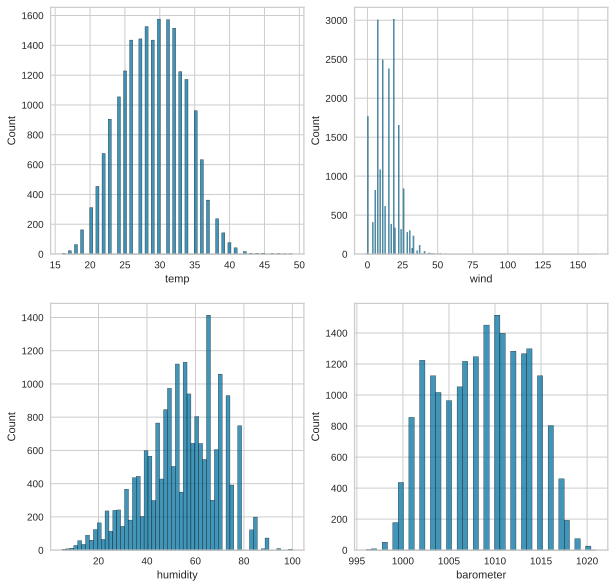

In [77]:
cols_to_plot = ['temp', 'wind', 'humidity', 'barometer']
plt.figure(figsize=(10, 10))
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df, x=col)

In [78]:
plot_features = df.groupby('date')[features].mean()

fig, axes = plt.subplots(
    nrows=2, 
    ncols=2, 
    figsize=(10, 8), 
    facecolor="w", 
    edgecolor="k"
)

for i, feature in enumerate(features):
    axes[i // 2, i % 2].plot(plot_features[feature])
    axes[i // 2, i % 2].set_title(f'{feature} Mecca - daily')
        
plt.tight_layout()

Text(0.5, 0, 'Date')

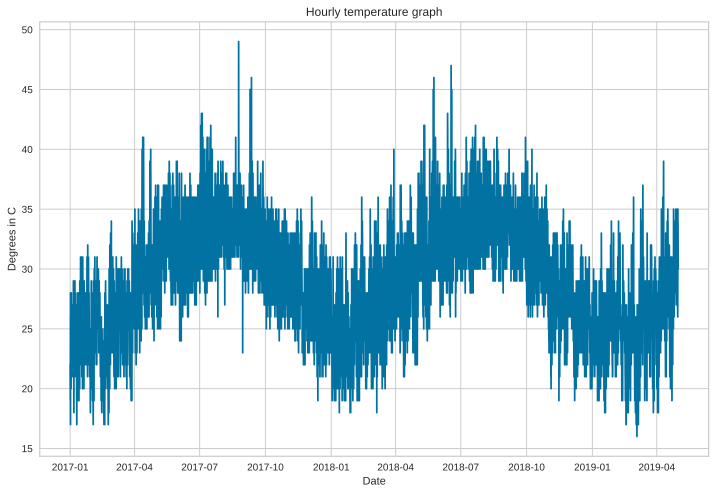

In [79]:
plt.figure(figsize=(12, 8))
plt.plot('Datetime', 'temp', data=df)
plt.title('Hourly temperature graph')
plt.ylabel('Degrees in C')
plt.xlabel('Date')

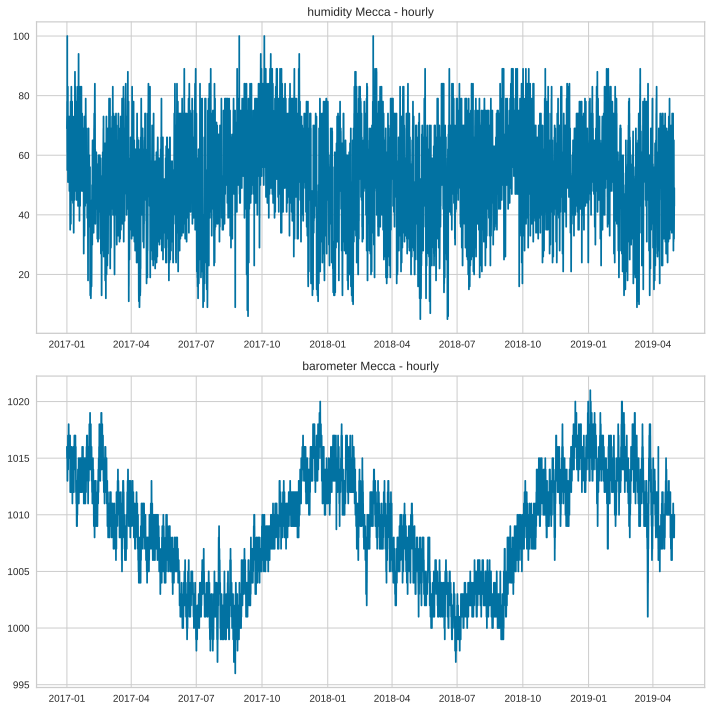

In [80]:
plot_features = df[features]
plot_features.index = df.Datetime

fig, axes = plt.subplots(
    nrows=2, 
    ncols=1, 
    figsize=(10, 10), 
    facecolor="w", 
    edgecolor="k"
)

for i, feature in enumerate(['humidity', 'barometer']):
    axes[i % 2].plot(plot_features[feature])
    axes[i % 2].set_title(f'{feature} Mecca - hourly')
        
plt.tight_layout()

### Heatmaps 

(996.0, 1021.0, 16.0, 49.0)

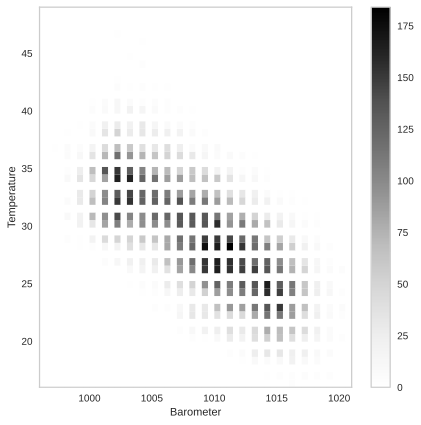

In [81]:
plt.figure(figsize=(7,7))
plt.hist2d(df['barometer'], df['temp'], bins=(50, 50))
plt.colorbar()
ax = plt.gca()
plt.xlabel('Barometer')
plt.ylabel('Temperature')
ax.axis('tight')

(5.0, 100.0, 16.0, 49.0)

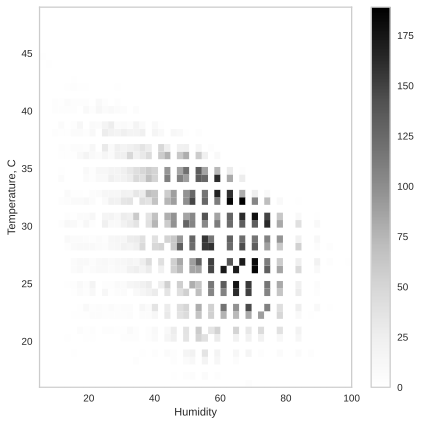

In [82]:
plt.figure(figsize=(7,7))
plt.hist2d(df['humidity'], df['temp'], bins=(50, 50))
plt.colorbar()
ax = plt.gca()
plt.xlabel('Humidity')
plt.ylabel('Temperature, C')
ax.axis('tight')

### Feature engineering 

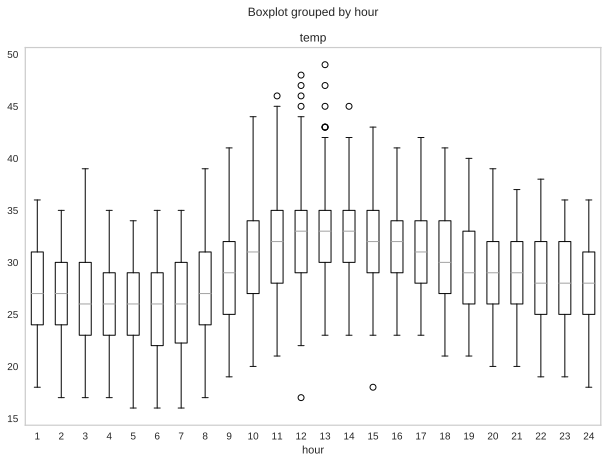

In [83]:
df.boxplot('temp', by='hour', figsize=(10,7), grid=False);

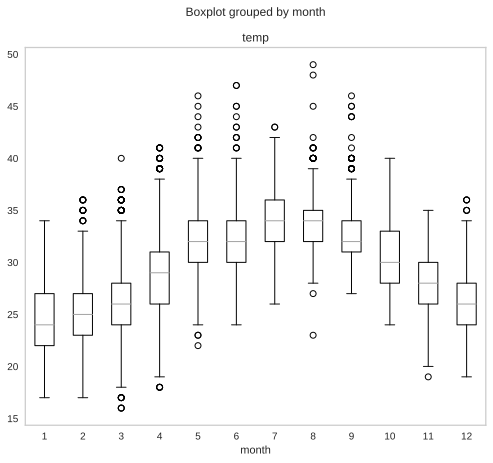

In [84]:
df.boxplot('temp', by='month', figsize=(8, 7), grid=False);

In [85]:
# Creating the cyclical daily feature 
df['day_cos'] = [np.cos(x * (2 * np.pi / 24)) for x in df['hour']]
df['day_sin'] = [np.sin(x * (2 * np.pi / 24)) for x in df['hour']]

In [86]:
dsin = df[['Datetime', 'temp', 'hour', 'day_sin', 'day_cos']].head(25).copy()
dsin['day_sin'] = [round(x, 3) for x in dsin['day_sin']]
dsin['day_cos'] = [round(x, 3) for x in dsin['day_cos']]

dsin

Datetime  temp  hour  day_sin  day_cos
0  2017-01-01 00:00:00    22    24   -0.000    1.000
1  2017-01-01 01:00:00    21     1    0.259    0.966
2  2017-01-01 02:00:00    21     2    0.500    0.866
3  2017-01-01 03:00:00    21     3    0.707    0.707
4  2017-01-01 04:00:00    21     4    0.866    0.500
5  2017-01-01 05:00:00    20     5    0.966    0.259
6  2017-01-01 06:00:00    20     6    1.000    0.000
7  2017-01-01 07:00:00    19     7    0.966   -0.259
8  2017-01-01 08:00:00    20     8    0.866   -0.500
9  2017-01-01 09:00:00    23     9    0.707   -0.707
10 2017-01-01 10:00:00    25    10    0.500   -0.866
11 2017-01-01 11:00:00    26    11    0.259   -0.966
12 2017-01-01 12:00:00    17    12    0.000   -1.000
13 2017-01-01 13:00:00    28    13   -0.259   -0.966
14 2017-01-01 14:00:00    27    14   -0.500   -0.866
15 2017-01-01 15:00:00    27    15   -0.707   -0.707
16 2017-01-01 16:00:00    26    16   -0.866   -0.500
17 2017-01-01 17:00:00    26    17   -0.966   -0.259
18 2017-01-01 18:00:00    25    18   -1.000   -0.000
19 2017-01-01 19:00:00    25    19   -0.966    0.259
20 2017-01-01 20:00:00    24    20   -0.866    0.500
21 2017-01-01 21:00:00    24    21   -0.707    0.707
22 2017-01-01 22:00:00    23    22   -0.500    0.866
23 2017-01-01 23:00:00    23    23   -0.259    0.966
24 2017-01-02 00:00:00    23    24   -0.000    1.000

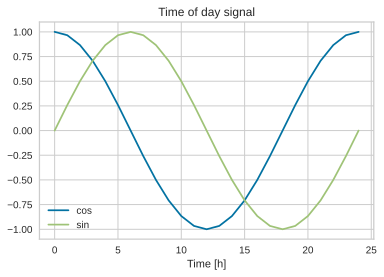

In [87]:
# Ploting the first 25 hours 
plt.plot(np.array(df['day_cos'])[:25], label='cos')
plt.plot(np.array(df['day_sin'])[:25], label='sin')
plt.xlabel('Time [h]')
plt.title('Time of day signal')
plt.legend()

## Prepare Data
---

In [116]:
# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

In [117]:
# convert time series into supervised learning problem
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

## Split

---

In [118]:
# transform series into train and test sets for supervised learning
def prepare_data(series, n_test, n_lag, n_seq):
	# extract raw values
	raw_values = series.values
	raw_values = raw_values.reshape(len(raw_values), 1)
	# rescale values to -1, 1
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaled_values = scaler.fit_transform(raw_values)
	scaled_values = scaled_values.reshape(len(scaled_values), 1)
	# transform into supervised learning problem X, y
	supervised = series_to_supervised(scaled_values, n_lag, n_seq)
	supervised_values = supervised.values
	# split into train and test sets
	train, test = supervised_values[0:-n_test], supervised_values[-n_test:]
	return scaler, train, test

In [119]:
# load dataset
df = pd.read_csv('/content/mkhdata.csv')
df.drop(['Unnamed: 0'], axis =1 , inplace =True)
series = df['temp']
# configure
n_lag = 24 #Look at 24 steps back to predict the future
n_seq = 1 #Predict the Future for one period ahead 
n_test = round(0.2*series.shape[0])
n_epochs = 20
n_batch = 1
#n_neurons = 1
# prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)

## Forecast & Evaluate Functions

---

In [120]:
# make one forecast with an LSTM,
def forecast_lstm(model, X, n_batch):
	# reshape input pattern to [samples, timesteps, features]
	X = X.reshape(1, 1, len(X))
	# make forecast
	forecast = model.predict(X, batch_size=n_batch)
	# convert to array
	return [x for x in forecast[0, :]]

In [121]:
# evaluate the persistence model
def make_forecasts(model, n_batch, train, test, n_lag, n_seq):
	forecasts = list()
	for i in range(len(test)):
		X, y = test[i, 0:n_lag], test[i, n_lag:]
		# make forecast
		forecast = forecast_lstm(model, X, n_batch)
		# store the forecast
		forecasts.append(forecast)
	return forecasts

In [122]:
# evaluate the RMSE for each forecast time step
def evaluate_forecasts(test, forecasts, n_lag, n_seq):
	for i in range(n_seq):
		actual = [row[i] for row in test]
		predicted = [forecast[i] for forecast in forecasts]
		rmse = sqrt(mean_squared_error(actual, predicted))
		print('t+%d RMSE: %f' % ((i+1), rmse))

In [123]:
# plot the forecasts in the context of the original dataset
def plot_forecasts(series, forecasts, n_test):
	# plot the entire dataset in blue
	pyplot.plot(series.values)
	# plot the forecasts in red
	for i in range(len(forecasts)):
		off_s = len(series) - n_test + i - 1
		off_e = off_s + len(forecasts[i]) + 1
		xaxis = [x for x in range(off_s, off_e)]
		yaxis = [series.values[off_s]] + forecasts[i]
		pyplot.plot(xaxis, yaxis, color='red')
	# show the plot
	pyplot.show()

## LSTM Models
---

In [43]:
# fit an LSTM network to training data with 20 neurons
def fit_lstm_1(train, n_lag, n_seq, n_batch, nb_epoch, n_neurons=20):
	# reshape training into [samples, timesteps, features]
	X, y = train[:, 0:n_lag], train[:, n_lag:]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	# design network
	model = Sequential()
	model.add(LSTM(n_neurons, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(y.shape[1]))
	model.compile(loss='mean_squared_error', optimizer='adam')
	# fit network
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=n_batch, verbose=0, shuffle=False)
		model.reset_states()
	return model

In [38]:
# fit an LSTM network to training data with 50 neurons
def fit_lstm_2(train, n_lag, n_seq, n_batch, nb_epoch, n_neurons=50):
	# reshape training into [samples, timesteps, features]
	X, y = train[:, 0:n_lag], train[:, n_lag:]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	# design network
	model = Sequential()
	model.add(LSTM(n_neurons, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(y.shape[1]))
	model.compile(loss='mean_squared_error', optimizer='adam')
	# fit network
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=n_batch, verbose=0, shuffle=False)
		model.reset_states()
	return model

---

In [129]:
# fit model
model_1 = fit_lstm_1(train, n_lag, n_seq, n_batch, n_epochs)
# make forecasts
forecasts = make_forecasts(model_1, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
actual = [row[n_lag:] for row in test]
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)

t+1 RMSE: 0.126512


In [130]:
model_1_rmse = evaluate_forecasts(actual, forecasts, n_lag, n_seq)

t+1 RMSE: 0.126512


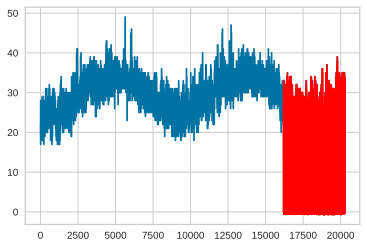

In [51]:
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

---

In [52]:
# fit model
model_2 = fit_lstm_2(train, n_lag, n_seq, n_batch, n_epochs)
# make forecasts
forecasts = make_forecasts(model_2, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
actual = [row[n_lag:] for row in test]
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)

t+1 RMSE: 0.150887


In [ ]:
model_2_rmse = evaluate_forecasts(actual, forecasts, n_lag, n_seq)

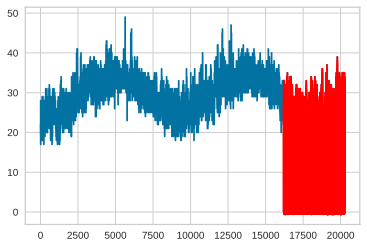

In [53]:
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

## LSTM Stacked Small & Big

---

In [62]:
# SMALL

# fit an LSTM network to training data
def fit_lstm_stacked_small(train, n_lag, n_seq, n_batch, nb_epoch):
	# reshape training into [samples, timesteps, features]
	X, y = train[:, 0:n_lag], train[:, n_lag:]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	# design network
	model = Sequential()
	model.add(LSTM(50, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True,activation='relu',return_sequences=True))
  #second LSTM layer 
	model.add(LSTM(50,activation='relu',return_sequences=True))
	model.add(Dense(y.shape[1]))
	model.compile(loss='mean_squared_error', optimizer='adam')
	# fit network
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=n_batch, verbose=0, shuffle=False)
		model.reset_states()
	return model

In [125]:
# fit model
model_3 = fit_lstm_stacked_small(train, n_lag, n_seq, n_batch, n_epochs)
# make forecasts
forecasts = make_forecasts(model_3, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
actual = [row[n_lag:] for row in test]
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)

t+1 RMSE: 0.210538


In [127]:
model_3_rmse = evaluate_forecasts(actual, forecasts, n_lag, n_seq)

t+1 RMSE: 0.210538


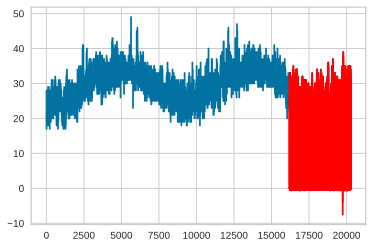

In [126]:
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

---

In [100]:
# BIG

# fit an LSTM network to training data
def fit_lstm_stacked_big(train, n_lag, n_seq, n_batch, nb_epoch):
	# reshape training into [samples, timesteps, features]
	X, y = train[:, 0:n_lag], train[:, n_lag:]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	# design network
	model = Sequential()
	model.add(LSTM(150, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True,return_sequences=True))
	model.add(Dropout(0.2)) # Dropout regularisation
  #second LSTM layer 
	model.add(LSTM(150,return_sequences=True))
  #Adding third LSTM layer 
	model.add(LSTM(150, return_sequences=True))
	model.add(Dropout(0.2))
  #Adding fourth LSTM layer
	model.add(LSTM(150))
	model.add(Dropout(0.2))
	model.add(Dense(y.shape[1]))
	model.compile(loss='mean_squared_error', optimizer='adam')
	# fit network
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=n_batch, verbose=0, shuffle=False)
		model.reset_states()
	return model

In [114]:
# fit model
model_4 = fit_lstm_stacked_big(train, n_lag, n_seq, n_batch, n_epochs)
# make forecasts
forecasts = make_forecasts(model_4, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
actual = [row[n_lag:] for row in test]
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)

t+1 RMSE: 0.116172


In [ ]:
model_4_rmse = evaluate_forecasts(actual, forecasts, n_lag, n_seq)

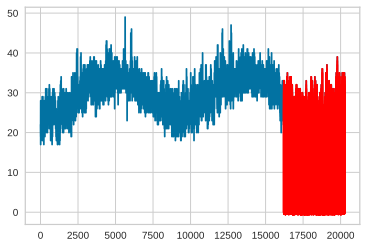

In [115]:
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

## Bi-directional LSTM

---

In [54]:
def fit_lstm_bi_1(train, n_lag, n_seq, n_batch, nb_epoch, n_neurons=20):
	# reshape training into [samples, timesteps, features]
	X, y = train[:, 0:n_lag], train[:, n_lag:]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	# design network
	model = Sequential()
	model.add(Bidirectional(LSTM(n_neurons, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True)))
	model.add(Dense(y.shape[1]))
	model.compile(loss='mean_squared_error', optimizer='adam')
	# fit network
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=n_batch, verbose=0, shuffle=False)
		model.reset_states()
	return model

---

In [55]:
# fit model
model_5 = fit_lstm_bi_1(train, n_lag, n_seq, n_batch, n_epochs)
# make forecasts
forecasts = make_forecasts(model_5, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
actual = [row[n_lag:] for row in test]
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)

t+1 RMSE: 0.126762


In [ ]:
model_5_rmse = evaluate_forecasts(actual, forecasts, n_lag, n_seq)

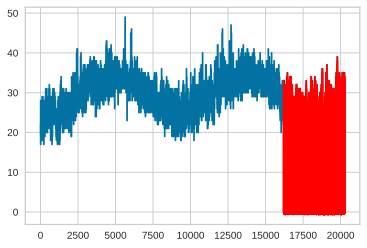

In [56]:
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

## Conclusion
---

In [135]:
# create dataframe of rmses to comparing
data = {'Models': ['model_1', 'model_2', 'model_3', 'model_4', 'model_5'], 
         'RMSE': [0.126512 , 0.150887 , 0.210538 , 0.116172 , 0.126762]}
RMSEs = pd.DataFrame(data)
RMSEs

Models      RMSE
0  model_1  0.126512
1  model_2  0.150887
2  model_3  0.210538
3  model_4  0.116172
4  model_5  0.126762

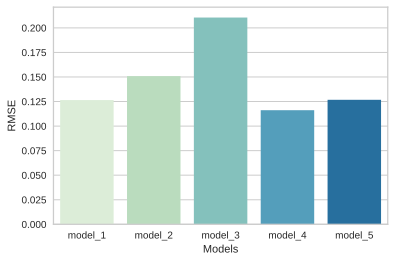

In [139]:
sns.barplot(x='Models', y='RMSE', data=RMSEs, palette= 'GnBu');
# plt.savefig('plot1.png', dpi=300, bbox_inches='tight');

From above we can say that the best model is **model_4,**

***the big stacked LSTM***. with the lowest *RMSE* (**0.116172**).

---